# Intro
This notebook shows how to get Caffe with GPU support running in Google Colab. I recommend using the manually compiled version - it gives a lot of power, enables to read, understand and change the framework's code easily.

If you have any problems, please refer [to the medium article](https://filip-drapejkowski.medium.com/caffe-in-google-colab-2021-2d730989c849
) which describes why each steps are necessary and hints how to deal with any future problems.

# GPU setup

## Runtime -> Change Runetime type -> Hardware acccelarator -> GPU

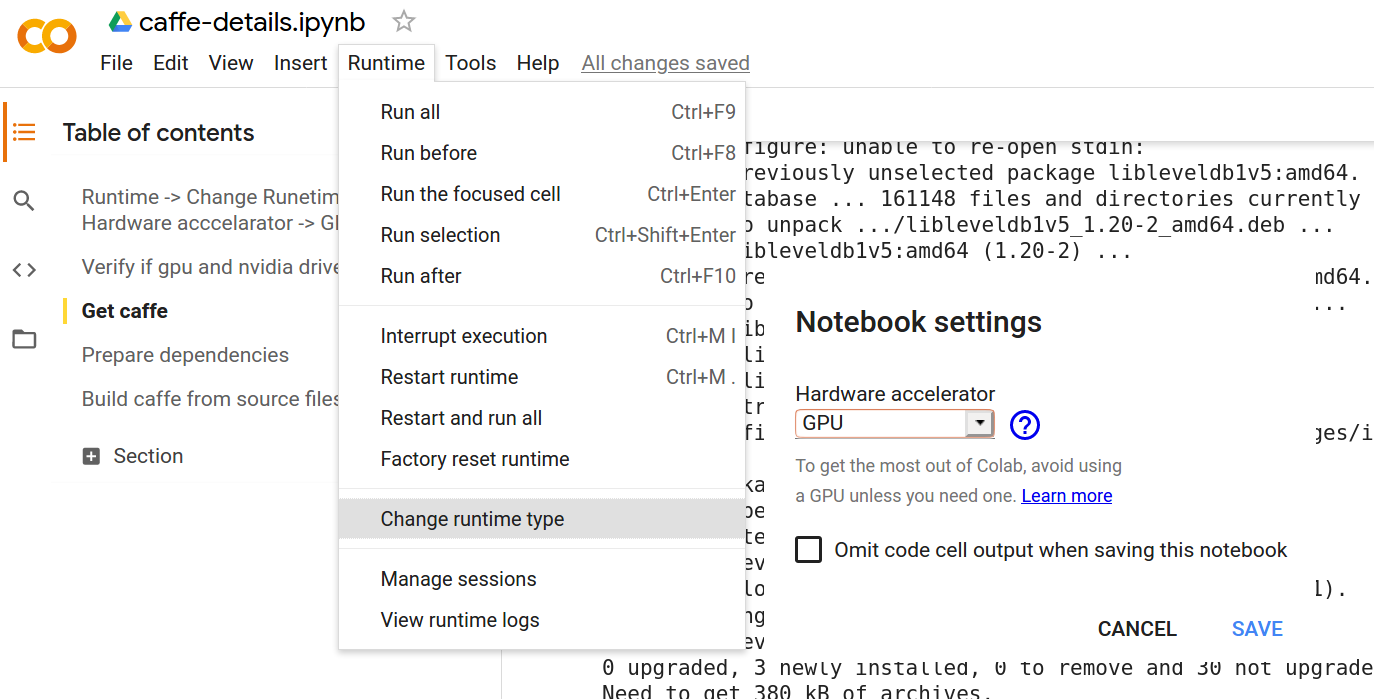

## Verify if gpu and nvidia drivers are present.

In [1]:
!nvidia-smi

Tue Oct  4 11:51:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Get caffe

In [ ]:
# !sudo apt build-dep caffe-cuda
# This fails for me

In [ ]:
!ls

In [2]:
!git clone https://github.com/BVLC/caffe.git
!git reset --hard 9b891540183ddc834a02b2bd81b31afae71b2153 #reset to the newest revision that worked OK on 27.03.2021

Cloning into 'caffe'...
remote: Enumerating objects: 65274, done.
remote: Total 65274 (delta 0), reused 0 (delta 0), pack-reused 65274
Receiving objects: 100% (65274/65274), 74.14 MiB | 5.79 MiB/s, done.
Resolving deltas: 100% (41245/41245), done.
fatal: not a git repository (or any of the parent directories): .git


# Install Prepare dependencies

In [3]:
# !sudo apt-cache search libhdf5-
# !sudo apt-cache search gflags
# !sudo apt --fix-broken install
!sudo apt-get install libgflags2.2 
!sudo apt-get install libgflags-dev
!sudo apt-get install libgoogle-glog-dev
# !sudo apt-get install libhdf5-10 - replaced with 100
!sudo apt-get install libhdf5-100
!sudo apt-get install libhdf5-serial-dev
!sudo apt-get install libhdf5-dev
# !sudo apt-get install libhdf5-cpp-11 - replaced with 100
!sudo apt-get install libhdf5-cpp-100
!sudo apt-get install libprotobuf-dev protobuf-compiler

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libgflags2.2
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 72.4 kB of archives.
After this operation, 312 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgflags2.2 amd64 2.2.1-1 [72.4 kB]
Fetched 72.4 kB in 1s (71.2 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dp

In [4]:
!find /usr -iname "*hdf5.so"
# got: /usr/lib/x86_64-linux-gnu/hdf5/serial
!find /usr -iname "*hdf5_hl.so"

/usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5.so
/usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5_hl.so


In [5]:
!sudo ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial.so /usr/lib/x86_64-linux-gnu/libhdf5.so
!sudo ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so /usr/lib/x86_64-linux-gnu/libhdf5_hl.so

In [6]:
#!find /usr -iname "*hdf5.h*" # got:
# /usr/include/hdf5/serial/hdf5.h 
# /usr/include/opencv2/flann/hdf5.h
# Let's try the first one.
%env CPATH="/usr/include/hdf5/serial/"
#fatal error: hdf5.h: No such file or directory

env: CPATH="/usr/include/hdf5/serial/"


In [7]:
!sudo apt-get install libleveldb-dev
!sudo apt-get install libgflags-dev libgoogle-glog-dev liblmdb-dev
!sudo apt-get install libsnappy-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libleveldb1v5
Suggested packages:
  leveldb-doc
The following NEW packages will be installed:
  libleveldb-dev libleveldb1v5
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 313 kB of archives.
After this operation, 1,336 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libleveldb1v5 amd64 1.20-2 [136 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libleveldb-dev amd64 1.20-2 [177 kB]
Fetched 313 kB in 2s (187 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 7

# Build caffe from source files

In [8]:
!echo $CPATH

"/usr/include/hdf5/serial/"


In [21]:
!cd caffe
!mkdir build

In [34]:
cd caffe/build

/content/caffe/build


Fare cmake .. quando dentro la cartella build

In [ ]:
!pwd
!cmake ..


In [ ]:
fare make all -j4 dentro build

In [38]:
!sudo make all -j4

[  0%] Running C++/Python protocol buffer compiler on /content/caffe/src/caffe/proto/caffe.proto
[  1%] Building CXX object src/caffe/CMakeFiles/caffeproto.dir/__/__/include/caffe/proto/caffe.pb.cc.o
[  1%] Linking CXX static library ../../lib/libcaffeproto.a
[  1%] Built target caffeproto
[  1%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/util/cuda_compile_1_generated_math_functions.cu.o
[  1%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_absval_layer.cu.o
[  2%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_base_data_layer.cu.o
[  2%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_accuracy_layer.cu.o
In file included from /content/caffe/src/caffe/util/math_functions.cu:1:0:
/usr/local/cuda/include/math_functions.h:54:2: warning: #warning "math_functions.h is an internal header file and must no

make install dentro build

In [39]:
!sudo make install

CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 2.8.12 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


CMake Warning (dev) at cmake/Misc.cmake:32 (set):
  implicitly converting 'BOOLEAN' to 'STRING' type.
Call Stack (most recent call first):
  CMakeLists.txt:25 (include)
This warning is for project developers.  Use -Wno-dev to suppress it.

-- Found Boost: /usr/include (found suitable version "1.65.1", minimum required is "1.54") found components: system thread filesystem chrono date_time atomic 
-- Found gflags  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libgflags.so)
-- Found glog    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libglog.so)
-- Found PROTOBUF Compiler: /usr/bin/protoc
-- Found lmdb    (include: /usr/include, library: /usr/lib/x86_64-lin

Installare pip2

In [40]:
!wget https://bootstrap.pypa.io/pip/2.7/get-pip.py
!python2 get-pip.py

--2022-10-04 12:12:41--  https://bootstrap.pypa.io/pip/2.7/get-pip.py
Resolving bootstrap.pypa.io (bootstrap.pypa.io)... 151.101.0.175, 151.101.64.175, 151.101.128.175, ...
Connecting to bootstrap.pypa.io (bootstrap.pypa.io)|151.101.0.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1908226 (1.8M) [text/x-python]
Saving to: ‘get-pip.py’

get-pip.py          100%[===================>]   1.82M  --.-KB/s    in 0.007s  

2022-10-04 12:12:41 (244 MB/s) - ‘get-pip.py’ saved [1908226/1908226]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 37.6 MB/s 
     |████████████████████████████████| 583 kB 68.1 MB/s 


In [ ]:
Non necessario 2to3, se python2.7 é installato 

In [41]:
#!pip2 install 2to3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for 2to3: filename=2to3-1.0-py2-none-any.whl size=1661 sha256=9920e32abfe5135d78a151880b5281e310ab4f15c252cc32555baada665b5b6d
  Stored in directory: /root/.cache/pip/wheels/15/c1/48/b8bdc88beaa406f552dfbb085f1a618bda79c9e17ebc14cab3
Successfully built 2to3


***Cerca la cartella Python2.7***

In [81]:
!sudo find / -name python2.7

/usr/lib/python2.7
/usr/include/python2.7
/usr/include/x86_64-linux-gnu/python2.7
/usr/bin/python2.7
/usr/share/lintian/overrides/python2.7
/usr/share/doc/python2.7
/usr/share/binfmts/python2.7
/usr/local/lib/python2.7
/etc/python2.7
find: ‘/proc/28/task/28/net’: Invalid argument
find: ‘/proc/28/net’: Invalid argument


***Move caffe/pythpn/caffe directory on /usr/lib/python2.7***

In [44]:
!sudo find / -name _caffe.so

find: ‘/proc/28/task/28/net’: Invalid argument
find: ‘/proc/28/net’: Invalid argument
/content/caffe/python/caffe/_caffe.so
/content/caffe/build/lib/_caffe.so
/content/caffe/build/install/python/caffe/_caffe.so


***Scaricare la repo DeepDreamVideo***

In [49]:
!git clone https://github.com/graphific/DeepDreamVideo.git

Cloning into 'DeepDreamVideo'...
remote: Enumerating objects: 351, done.
remote: Total 351 (delta 0), reused 0 (delta 0), pack-reused 351
Receiving objects: 100% (351/351), 40.87 MiB | 13.61 MiB/s, done.
Resolving deltas: 100% (186/186), done.


In [50]:
cd DeepDreamVideo/

/content/DeepDreamVideo


***SOLO PER TEST SCARICARE FEAR-AND-LOATHING***

In [51]:
#!git clone https://github.com/graphific/Fear-and-Loathing-experiment.git

Cloning into 'Fear-and-Loathing-experiment'...
remote: Enumerating objects: 5866, done.
remote: Total 5866 (delta 0), reused 0 (delta 0), pack-reused 5866
Receiving objects: 100% (5866/5866), 206.98 MiB | 15.16 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [52]:
#!rm -rf Fear-and-Loathing-experiment/

In [54]:
!sudo apt install pngcrush

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  pngcrush
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 49.9 kB of archives.
After this operation, 135 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pngcrush amd64 1.7.85-1build1 [49.9 kB]
Fetched 49.9 kB in 1s (68.2 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpk

***INSERIRE IL VIDEO NELLA CARTELLA DI DEEPDREAMVIDEO***

>  eseguire il comando "!sudo ./1_movie2frames.sh ffmpeg input.mp4 images/ png"


In [56]:
!sudo ./1_movie2frames.sh ffmpeg input.mp4 images/ png

Removing files in images//*
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 

***Creare una cartella di output***

In [57]:
mkdir output

***INSTALLARE LE VARIE DIPENDENZE CON PIP2***

In [65]:
!pip2 install scipy pillow protobuf scikit-image pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.5 MB 1.3 MB/s 
     |████████████████████████████████| 12.8 MB 58.5 MB/s 
     |████████████████████████████████| 1.7 MB 63.2 MB/s 
     |████████████████████████████████| 4.4 MB 60.2 MB/s 
     |████████████████████████████████| 247 kB 83.5 MB/s 
     |████████████████████████████████| 93 kB 1.8 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 500 kB 75.1 MB/s 
     |████████████████████████████████| 69 kB 8.1 MB/s 
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526903 sha256=0f1af555974ab934ca44c02cbdf9354459eee41fd6a1e7bc953f9cc020d8a8e1
  Stored in directory: /root/.cache/pip/wheels/df/80/48/106e63760ff0dcd3658613d93c1ecf64301b9261172f2c1acf
Successfully built networkx


***COMANDO PER SCARICARE I MODULI, RUNNARE SOLO SE SERVE***

In [74]:
#!python2 ../caffe/scripts/download_model_binary.py ../caffe/models/bvlc_googlenet/

../caffe/scripts/download_model_binary.py:37: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  frontmatter = yaml.load('\n'.join(lines[top + 1:bottom]))
...100%, 51 MB, 11067 KB/s, 4 seconds passed

***COMANDO PER PROCESSARE I FRAME***

In [85]:
!python2 2_dreaming_time.py -i images/ -o output/ -it png --gpu 0 -b random

GPU mode [device id: 0]
using GPU, but you'd still better make a cup of coffee
I1004 13:33:58.138201  8378 net.cpp:53] Initializing net from parameters: 
name: "GoogleNet"
force_backward: true
state {
  phase: TEST
  level: 0
}
layer {
  name: "data"
  type: "Input"
  top: "data"
  input_param {
    shape {
      dim: 10
      dim: 3
      dim: 224
      dim: 224
    }
  }
}
layer {
  name: "conv1/7x7_s2"
  type: "Convolution"
  bottom: "data"
  top: "conv1/7x7_s2"
  param {
    lr_mult: 1
    decay_mult: 1
  }
  param {
    lr_mult: 2
    decay_mult: 0
  }
  convolution_param {
    num_output: 64
    pad: 3
    kernel_size: 7
    stride: 2
    weight_filler {
      type: "xavier"
      std: 0.1
    }
    bias_filler {
      type: "constant"
      value: 0.2
    }
  }
}
layer {
  name: "conv1/relu_7x7"
  type: "ReLU"
  bottom: "conv1/7x7_s2"
  top: "conv1/7x7_s2"
}
layer {
  name: "pool1/3x3_s2"
  type: "Pooling"
  bottom: "conv1/7x7_s2"
  top: "pool1/3x3_s2"
  pooling_param {
    pool

***COMANDO PER CREARE IL VIDEO FINALE***

In [86]:
!./3_frames2movie.sh ffmpeg output/ input.mp4 png

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li